In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [98]:
df.shape

(13320, 9)

In [99]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [100]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [101]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [102]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [103]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [104]:
df[df['bath']>10].count()

area_type       20
availability    20
location        20
size            20
society          2
total_sqft      20
bath            20
balcony          6
price           20
dtype: int64

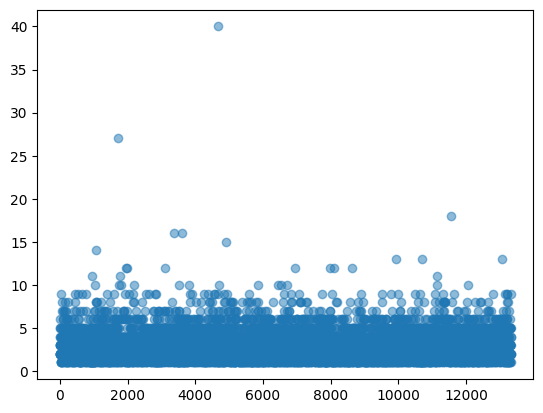

In [105]:
plt.scatter( df.index, df['bath'],  alpha=0.5)
plt.show()

In [106]:
backup=df

In [107]:
df=df[df['bath']<=10]

In [108]:
df.shape

(13227, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13227 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13227 non-null  object 
 1   availability  13227 non-null  object 
 2   location      13226 non-null  object 
 3   size          13227 non-null  object 
 4   society       7746 non-null   object 
 5   total_sqft    13227 non-null  object 
 6   bath          13227 non-null  float64
 7   balcony       12705 non-null  float64
 8   price         13227 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [110]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [111]:
# You removed rows where the ‘bath’ value is greater than 10.

# You created new features ‘Bedroom’, ‘Hall’, ‘Kitchen’ from the ‘size’ column.
# You also handled range values in the ‘total_sqft’ column and converted it to float type.

# You dropped the ‘society’, ‘availability’, and ‘size’ columns.
# You also calculated a new feature ‘Price Per square foot’.
# You encoded the ‘area_type’ column using OrdinalEncoder and 
# dropped the original ‘area_type’ column.

# You filled NaN values in the ‘balcony’ column with the median, 
# removed outliers in ‘total_sqft’ and 
# ‘price’ using Z-score, and scaled features using StandardScaler.



In [112]:
# Create new features 'Bedroom', 'Hall', 'Kitchen'
df['Bedroom'] = df['size'].str.extract('(\d+)').astype(float)
df['Hall'] = df['size'].apply(lambda x: 1 if 'BHK' in str(x) else 0)
df['Kitchen'] = df['size'].apply(lambda x: 1 if 'BHK' in str(x) else 0)


C:\Users\278bs\AppData\Local\Temp\ipykernel_7240\3949910382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bedroom'] = df['size'].str.extract('(\d+)').astype(float)
C:\Users\278bs\AppData\Local\Temp\ipykernel_7240\3949910382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hall'] = df['size'].apply(lambda x: 1 if 'BHK' in str(x) else 0)
C:\Users\278bs\AppData\Local\Temp\ipykernel_7240\3949910382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [113]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0,1,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0,1,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0,1,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5.0,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4.0,1,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0,1,1
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0,1,1


In [114]:
# Assuming 'total_sqft' is the column with the range value
df = df[~df['total_sqft'].str.contains('-')]


In [115]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0,1,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0,1,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0,1,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5.0,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4.0,1,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0,1,1
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0,1,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13083 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13083 non-null  object 
 1   availability  13083 non-null  object 
 2   location      13082 non-null  object 
 3   size          13083 non-null  object 
 4   society       7602 non-null   object 
 5   total_sqft    13083 non-null  object 
 6   bath          13083 non-null  float64
 7   balcony       12561 non-null  float64
 8   price         13083 non-null  float64
 9   Bedroom       13083 non-null  float64
 10  Hall          13083 non-null  int64  
 11  Kitchen       13083 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 1.3+ MB


In [117]:
# Assuming 'total_sqft' is the column with the '34.46Sq. Meter' value
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Perch', '').str.replace('Perch', '').str.replace('Sq. Yards', '').str.replace('Acres', '').str.replace('Cents', '').str.replace('Guntha', '').str.replace('Grounds', '').astype(float)


C:\Users\278bs\AppData\Local\Temp\ipykernel_7240\602905821.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Perch', '').str.replace('Perch', '').str.replace('Sq. Yards', '').str.replace('Acres', '').str.replace('Cents', '').str.replace('Guntha', '').str.replace('Grounds', '').astype(float)
C:\Users\278bs\AppData\Local\Temp\ipykernel_7240\602905821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Perch', '').str.replace('Perch', '').str.replace('Sq. Yards', '').str.replace('Acres', '').str.replace('Cents', '').str.replace('Guntha', '').str

In [118]:
def is_not_number(x):
    try:
        float(x)
        return False
    except ValueError:
        return True

# Apply the function to the 'total_sqft' column
df[df['total_sqft'].apply(is_not_number)]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen


In [119]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,1,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,1,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,1,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5.0,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00,4.0,1,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2.0,1,1
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4.0,1,1


In [120]:
# Assuming df is your DataFrame
df = df.drop(['society', 'availability'], axis=1)


In [121]:
# Assuming df is your DataFrame
df = df.drop(['size'], axis=1)


In [122]:
df['Price Per square foot']=(df['price']*100000)/df['total_sqft']

In [123]:
df

,area_type,location,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen,Price Per square foot
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,1,1,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,0,0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,1,1,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,1,1,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0,1,1,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0,0,0,6689.834926
13316,Super built-up Area,Richards Town,3600.0,5.0,NaN,400.00,4.0,1,1,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,1,1,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,1,1,10407.336319


In [124]:
# Import necessary library
from sklearn.preprocessing import OrdinalEncoder

# Define the order of your categories
categories = [['Carpet  Area', 'Built-up  Area', 'Plot  Area', 'Super built-up  Area']]

# Create the encoder
encoder = OrdinalEncoder(categories=categories)

# Assuming df is your DataFrame and 'area_type' is the column to encode
df['area_type_encoded'] = encoder.fit_transform(df[['area_type']])


In [125]:
# Assuming df is your DataFrame
df = df.drop(['area_type'], axis=1)


In [128]:
df

,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen,Price Per square foot,area_type_encoded,location_ Banaswadi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,1056.0,2.0,1.0,39.07,2.0,1,1,3699.810606,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4.0,0,0,4615.384615,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3.0,1,1,4305.555556,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,1,1,6245.890861,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,1,1,4250.000000,3.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,5.0,0,0,6689.834926,1.0,0,...,0,0,0,0,0,0,0,0,0,0
13316,3600.0,5.0,NaN,400.00,4.0,1,1,11111.111111,3.0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,1.0,60.00,2.0,1,1,5258.545136,1.0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,1.0,488.00,4.0,1,1,10407.336319,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13083 entries, 0 to 13319
Columns: 1304 entries, total_sqft to location_whitefiled
dtypes: float64(7), int64(2), uint8(1295)
memory usage: 17.2 MB


In [130]:
df.describe()

,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen,Price Per square foot,area_type_encoded,location_ Banaswadi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
count,13083.000000,13083.000000,12561.000000,13083.000000,13083.000000,13083.000000,13083.000000,1.308300e+04,13083.000000,13083.000000,...,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000
mean,1547.461557,2.674463,1.603296,112.074494,2.789880,0.808301,0.808301,1.245839e+04,2.461209,0.000076,...,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000306,0.000076,0.000076,0.000076
std,1230.563230,1.220604,0.803467,146.191194,1.184268,0.393653,0.393653,2.276717e+05,0.808392,0.008743,...,0.008743,0.008743,0.008743,0.008743,0.008743,0.008743,0.017483,0.008743,0.008743,0.008743
min,1.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000,2.678298e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,4.270109e+03,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1272.000000,2.000000,2.000000,72.000000,3.000000,1.000000,1.000000,5.454545e+03,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1665.000000,3.000000,2.000000,120.000000,3.000000,1.000000,1.000000,7.358365e+03,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52272.000000,10.000000,3.000000,2912.000000,12.000000,1.000000,1.000000,1.600000e+07,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

# Assuming df is your DataFrame

# 1. Fill NaN values in 'balcony' with the median
df['balcony'].fillna(df['balcony'].median(), inplace=True)

# 2. Remove outliers in 'total_sqft' and 'price' using Z-score
df = df[(np.abs(stats.zscore(df[['total_sqft', 'price']])) < 3).all(axis=1)]

# 3. Scale features using StandardScaler
scaler = StandardScaler()
df[['total_sqft', 'bath', 'balcony',  'Bedroom', 'Price Per square foot']] = scaler.fit_transform(df[['total_sqft', 'bath', 'balcony',  'Bedroom', 'Price Per square foot']])


C:\Users\278bs\AppData\Local\Temp\ipykernel_7240\208054702.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['total_sqft', 'bath', 'balcony',  'Bedroom', 'Price Per square foot']] = scaler.fit_transform(df[['total_sqft', 'bath', 'balcony',  'Bedroom', 'Price Per square foot']])


In [132]:
df

,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen,Price Per square foot,area_type_encoded,location_ Banaswadi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,-0.593164,-0.538997,-0.778697,39.07,-0.655990,1,1,-0.037592,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.664678,1.991802,1.752905,120.00,1.068568,0,0,-0.033607,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.031628,-0.538997,1.752905,62.00,0.206289,1,1,-0.034955,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.086821,0.304602,-0.778697,95.00,0.206289,1,1,-0.026510,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.382588,-0.538997,-0.778697,51.00,-0.655990,1,1,-0.035197,3.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,2.912047,1.148202,-2.044498,231.00,1.930846,0,0,-0.024578,1.0,0,...,0,0,0,0,0,0,0,0,0,0
13316,3.127010,1.991802,0.487104,400.00,1.068568,1,1,-0.005334,3.0,0,...,0,0,0,0,0,0,0,0,0,0
13317,-0.468865,-0.538997,-0.778697,60.00,-0.655990,1,1,-0.030807,1.0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.719490,1.148202,-0.778697,488.00,1.068568,1,1,-0.008397,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'price' is the target variable
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [135]:
from sklearn.metrics import mean_squared_error

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 3853561575.580081


In [136]:
from sklearn.metrics import r2_score

# Assuming y_test are the actual values and y_pred are the predicted values
r2 = r2_score(y_test, y_pred)

print('R-squared score: ', r2)


R-squared score:  -2191454604640254.5


In [40]:
# Import pandas
import pandas as pd

# Create a DataFrame from the test set
df_test = pd.DataFrame(X_test)

# Add the actual values to the DataFrame
df_test['Actual_Price'] = y_test

# Add the predicted values to the DataFrame
df_test['Predicted_Price'] = y_pred

# Display the top rows of the DataFrame
print(df_test.head())


       total_sqft      bath   balcony   Bedroom  Hall  Kitchen  \
1681     1.373108  1.172571 -0.778304  1.960284     0        0   
10301   -0.315379 -0.542487 -0.778304 -0.659643     1        1   
11009   -1.260581  1.172571  0.487698  1.086975     0        0   
11593   -0.529000 -0.542487  0.487698 -0.659643     1        1   
5687    -1.406897 -1.400015 -0.778304 -1.532952     1        1   

       Price Per square foot  area_type_encoded  Actual_Price  Predicted_Price  
1681                0.000717                2.0         300.0       211.144062  
10301              -0.020495                3.0          95.0        69.138758  
11009               0.015219                2.0          95.0        89.007338  
11593              -0.024003                1.0          75.0        55.061000  
5687               -0.038874                1.0          17.0         1.026095  


In [42]:
# Save DataFrame to a CSV file
df_test.to_csv('df_test.csv', index=False)


In [43]:
# Calculate the absolute difference between actual and predicted values
df_test['Difference'] = abs(df_test['Actual_Price'] - df_test['Predicted_Price'])

# Sort the DataFrame by the 'Difference' column
df_test_sorted = df_test.sort_values('Difference')

# Display the top rows of the sorted DataFrame
print(df_test_sorted.head())


      total_sqft      bath   balcony   Bedroom  Hall  Kitchen  \
4670   -0.675316 -0.542487  0.487698 -0.659643     1        1   
6959   -0.529000  0.315042 -0.778304  0.213666     0        0   
5358   -0.176379 -0.542487 -0.778304 -0.659643     1        1   
8319   -0.432432 -0.542487  1.753699 -0.659643     1        1   
769    -0.360737 -0.542487 -0.778304 -0.659643     1        1   

      Price Per square foot  area_type_encoded  Actual_Price  Predicted_Price  \
4670              -0.032783                1.0         48.00        47.999059   
6959              -0.010160                1.0        110.00       109.987313   
5358              -0.029087                3.0         75.76        75.783802   
8319              -0.029413                3.0         65.00        64.929183   
769               -0.029675                3.0         67.00        66.925224   

      Difference  
4670    0.000941  
6959    0.012687  
5358    0.023802  
8319    0.070817  
769     0.074776  


In [44]:
df_test_sorted

,total_sqft,bath,balcony,Bedroom,Hall,Kitchen,Price Per square foot,area_type_encoded,Actual_Price,Predicted_Price,Difference
4670,-0.675316,-0.542487,0.487698,-0.659643,1,1,-0.032783,1.0,48.00,47.999059,0.000941
6959,-0.529000,0.315042,-0.778304,0.213666,0,0,-0.010160,1.0,110.00,109.987313,0.012687
5358,-0.176379,-0.542487,-0.778304,-0.659643,1,1,-0.029087,3.0,75.76,75.783802,0.023802
8319,-0.432432,-0.542487,1.753699,-0.659643,1,1,-0.029413,3.0,65.00,64.929183,0.070817
769,-0.360737,-0.542487,-0.778304,-0.659643,1,1,-0.029675,3.0,67.00,66.925224,0.074776
...,...,...,...,...,...,...,...,...,...,...,...
13019,0.846370,1.172571,-0.778304,1.960284,0,0,0.052968,2.0,500.00,186.037034,313.962966
12483,1.373108,2.030099,1.753699,1.086975,0,0,0.046036,2.0,550.00,231.053178,318.946822
6055,2.397320,1.172571,1.753699,1.086975,1,1,0.023523,3.0,550.00,223.231091,326.768909
2863,0.056264,-0.542487,-0.778304,1.086975,0,0,0.076854,2.0,450.00,122.402320,327.597680


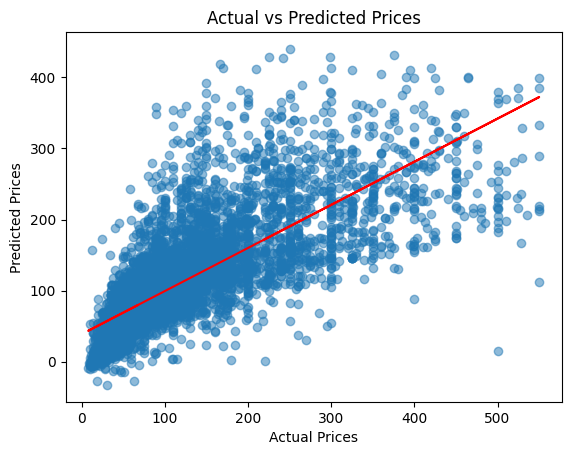

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot of predicted vs actual values
plt.scatter(y_train, y_train_pred, alpha=0.5)

# Plot a linear regression line
m, b = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, m*y_train + b, color='red')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [42]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming that 'X' is your feature set and 'y' are the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM Regressor
regressor = svm.SVR(kernel='linear') # Linear Kernel

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = regressor.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 3016.3027452518013


In [43]:
from sklearn.metrics import r2_score

# Assuming y_test are the actual values and y_pred are the predicted values
r2 = r2_score(y_test, y_pred)

print('R-squared score: ', r2)


R-squared score:  0.6034401158370268
